# Problem statement:
PREDICT THE BURNED AREA OF FOREST FIRES WITH NEURAL NETWORKS

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as  plt
import seaborn as sns
%matplotlib inline

In [2]:
# load the data set
df=pd.read_csv("C:/Users/hp/Desktop/DATA SCIENCE COURSE/ASSIGNMENT/ASSIGNMENT 15-NEURAL NETWORK/forestfires.csv")
df


,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,small


In [3]:
df1=df.drop(['month','day'],axis=1)

In [4]:
df1

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,1,...,0,0,0,0,1,0,0,0,0,small
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,0,...,0,0,0,0,0,0,0,1,0,small
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,0,...,0,0,0,0,0,0,0,1,0,small
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,1,...,0,0,0,0,1,0,0,0,0,small
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,0,...,0,0,0,0,0,0,0,0,0,large
513,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,0,...,0,0,0,0,0,0,0,0,0,large
514,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,0,...,0,0,0,0,0,0,0,0,0,large
515,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,0,...,0,0,0,0,0,0,0,0,0,small


In [5]:
df1.size_category.value_counts()

small    378
large    139
Name: size_category, dtype: int64

<AxesSubplot:xlabel='month', ylabel='count'>

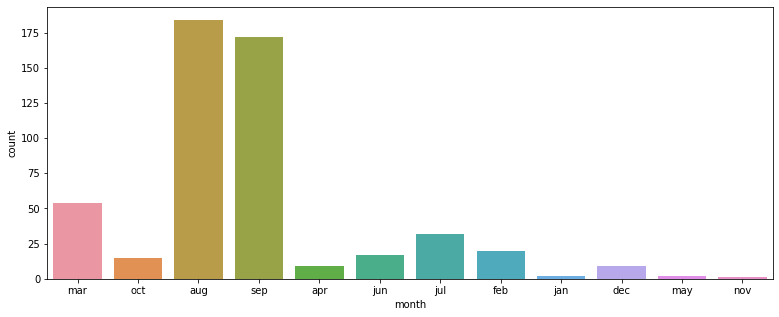

In [6]:
plt.rcParams['figure.figsize']=[13,5]
sns.countplot(x='month',data=df)


<AxesSubplot:xlabel='day', ylabel='count'>

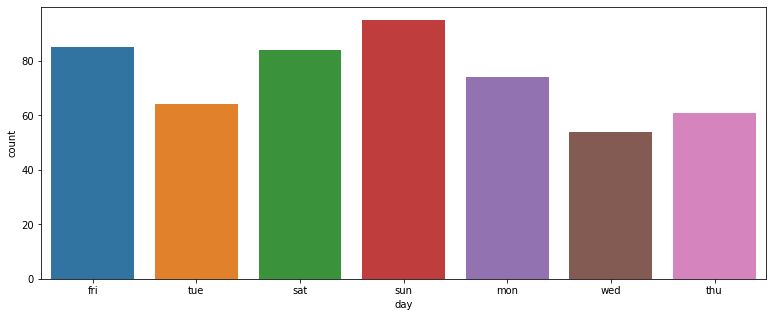

In [7]:
sns.countplot(x='day',data=df)

 1. most no of fire occure in month of aug and sep
 2. most no of fire occure on the sun followed by sat and friday

FFMC       AxesSubplot(0.125,0.657941;0.227941x0.222059)
DMC     AxesSubplot(0.398529,0.657941;0.227941x0.222059)
DC      AxesSubplot(0.672059,0.657941;0.227941x0.222059)
ISI        AxesSubplot(0.125,0.391471;0.227941x0.222059)
temp    AxesSubplot(0.398529,0.391471;0.227941x0.222059)
RH      AxesSubplot(0.672059,0.391471;0.227941x0.222059)
wind          AxesSubplot(0.125,0.125;0.227941x0.222059)
rain       AxesSubplot(0.398529,0.125;0.227941x0.222059)
area       AxesSubplot(0.672059,0.125;0.227941x0.222059)
dtype: object

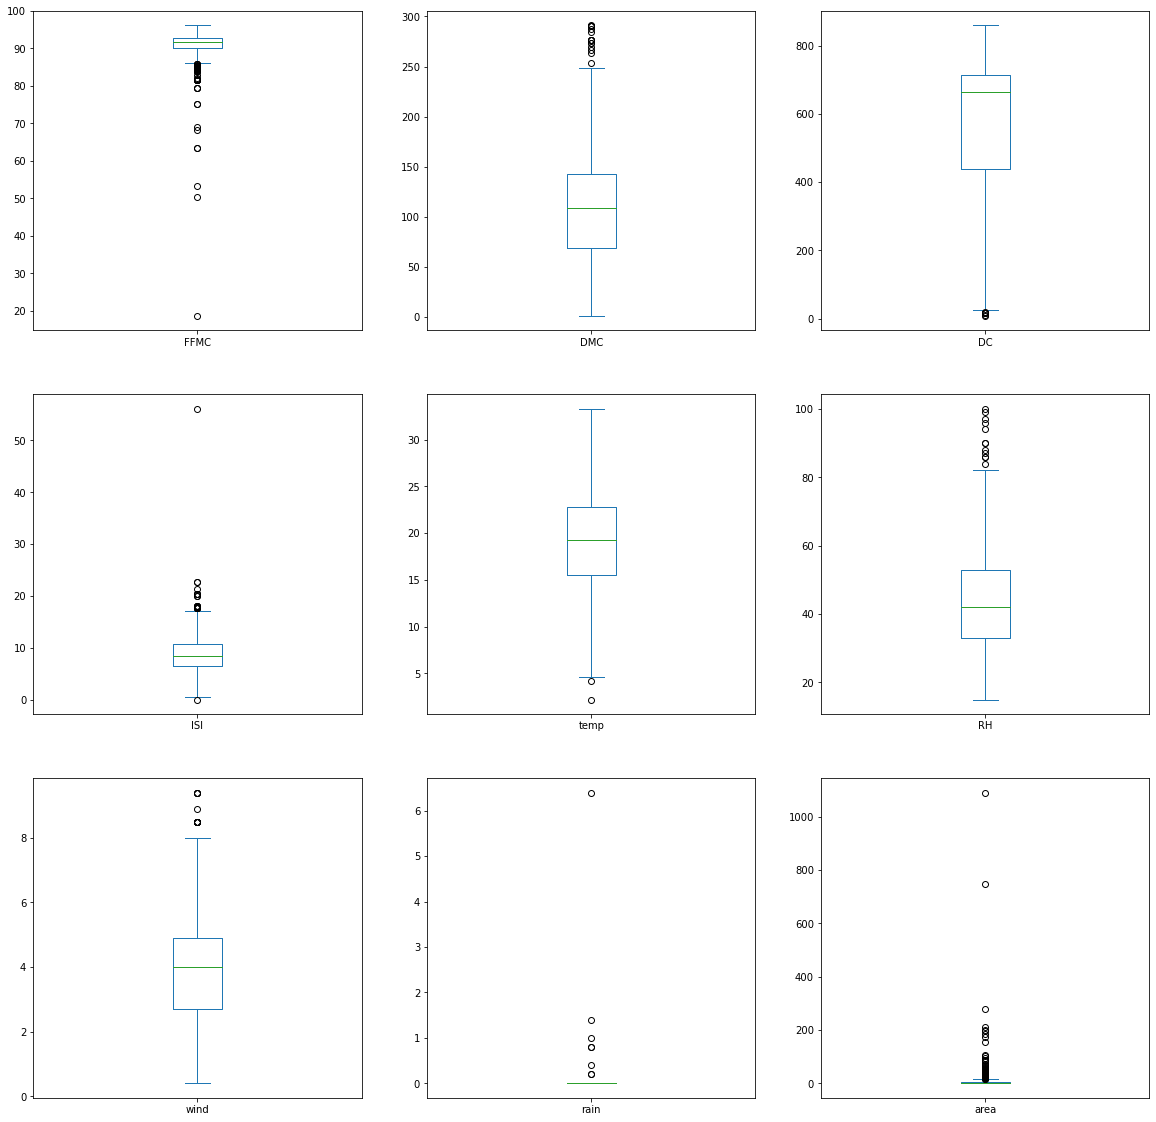

In [8]:
#Plotting the boxplot to check the outliers
df1[['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind','rain', 'area']].plot(kind='box',figsize=(20,20),subplots=True,layout=(3,3))

In [9]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 29 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   FFMC           517 non-null    float64
 1   DMC            517 non-null    float64
 2   DC             517 non-null    float64
 3   ISI            517 non-null    float64
 4   temp           517 non-null    float64
 5   RH             517 non-null    int64  
 6   wind           517 non-null    float64
 7   rain           517 non-null    float64
 8   area           517 non-null    float64
 9   dayfri         517 non-null    int64  
 10  daymon         517 non-null    int64  
 11  daysat         517 non-null    int64  
 12  daysun         517 non-null    int64  
 13  daythu         517 non-null    int64  
 14  daytue         517 non-null    int64  
 15  daywed         517 non-null    int64  
 16  monthapr       517 non-null    int64  
 17  monthaug       517 non-null    int64  
 18  monthdec  

In [10]:
corr=df1[df1.columns[0:9]].corr()

<AxesSubplot:>

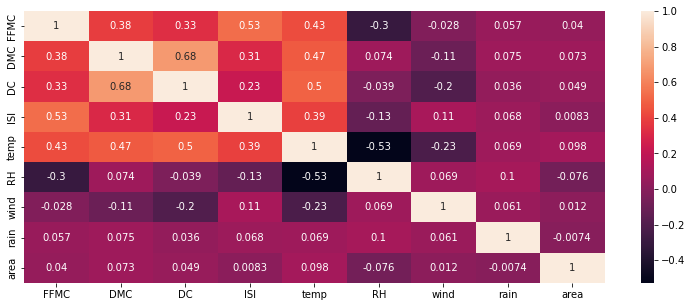

In [11]:
sns.heatmap(corr,annot=True)

# buiding the neural network model


In [12]:
mapping={'small':1,'large':2}

In [13]:
df1=df1.replace(mapping)

In [14]:
df1

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,1,...,0,0,0,0,1,0,0,0,0,1
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,0,...,0,0,0,0,0,0,0,1,0,1
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,0,...,0,0,0,0,0,0,0,1,0,1
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,1,...,0,0,0,0,1,0,0,0,0,1
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,0,...,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,0,...,0,0,0,0,0,0,0,0,0,2
513,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,0,...,0,0,0,0,0,0,0,0,0,2
514,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,0,...,0,0,0,0,0,0,0,0,0,2
515,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,0,...,0,0,0,0,0,0,0,0,0,1


In [15]:
#splitting the data into dependent and independent variables
x=np.array(df1.iloc[:,0:28])
y=np.array(df1.iloc[:,28])

In [16]:
#standardizing the data
def norm_function(i):
    x=(i-i.min())/(i.max()-i.min())
    return(x)


In [17]:
x_norm=norm_function(x)

In [18]:
x_norm

array([[0.07902167, 0.02401819, 0.08644714, ..., 0.        , 0.        ,
        0.        ],
       [0.08305526, 0.03245206, 0.61338051, ..., 0.        , 0.00091672,
        0.        ],
       [0.08305526, 0.04006087, 0.62969821, ..., 0.        , 0.00091672,
        0.        ],
       ...,
       [0.07480474, 0.05197829, 0.61017198, ..., 0.        , 0.        ,
        0.        ],
       [0.08653881, 0.13384181, 0.56351069, ..., 0.        , 0.        ,
        0.        ],
       [0.07287962, 0.00275017, 0.09781453, ..., 0.00091672, 0.        ,
        0.        ]])

In [50]:
# divide the data into testing and trsining
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_norm,y,test_size=0.2,random_state=1)

In [51]:
# import the modele for neural network
import keras
from keras.models import Sequential
from keras.layers import Dense,Activation,Layer,Lambda

In [52]:
# building the models
model=Sequential()
model.add(Dense(12, input_dim=28,activation='relu'))
model.add(Dense(8,activation='relu'))
model.add(Dense(1,activation='sigmoid'))



In [53]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [54]:
#fitting the model over training data
history=model.fit(x_train,y_train,epochs=150,batch_size=10,validation_split=0.33)

Epoch 1/150
28/28 [==============================] - 1s 25ms/step - loss: 0.6741 - accuracy: 0.5181 - val_loss: 0.6194 - val_accuracy: 0.7591
Epoch 2/150
28/28 [==============================] - 0s 3ms/step - loss: 0.5531 - accuracy: 0.7210 - val_loss: 0.4951 - val_accuracy: 0.7591
Epoch 3/150
28/28 [==============================] - 0s 3ms/step - loss: 0.4132 - accuracy: 0.7210 - val_loss: 0.3660 - val_accuracy: 0.7591
Epoch 4/150
28/28 [==============================] - 0s 2ms/step - loss: 0.2726 - accuracy: 0.7210 - val_loss: 0.2280 - val_accuracy: 0.7591
Epoch 5/150
28/28 [==============================] - 0s 2ms/step - loss: 0.1172 - accuracy: 0.7210 - val_loss: 0.0831 - val_accuracy: 0.7591
Epoch 6/150
28/28 [==============================] - 0s 3ms/step - loss: -0.0454 - accuracy: 0.7210 - val_loss: -0.0670 - val_accuracy: 0.7591
Epoch 7/150
28/28 [==============================] - 0s 2ms/step - loss: -0.2115 - accuracy: 0.7210 - val_loss: -0.2148 - val_accuracy: 0.7591
Epoch 8/

28/28 [==============================] - 0s 3ms/step - loss: -111.1169 - accuracy: 0.7210 - val_loss: -94.2158 - val_accuracy: 0.7591
Epoch 58/150
28/28 [==============================] - 0s 3ms/step - loss: -116.7522 - accuracy: 0.7210 - val_loss: -98.9054 - val_accuracy: 0.7591
Epoch 59/150
28/28 [==============================] - 0s 2ms/step - loss: -122.3656 - accuracy: 0.7210 - val_loss: -104.0663 - val_accuracy: 0.7591
Epoch 60/150
28/28 [==============================] - 0s 2ms/step - loss: -128.4928 - accuracy: 0.7210 - val_loss: -108.7709 - val_accuracy: 0.7591
Epoch 61/150
28/28 [==============================] - 0s 2ms/step - loss: -134.4171 - accuracy: 0.7210 - val_loss: -113.9745 - val_accuracy: 0.7591
Epoch 62/150
28/28 [==============================] - 0s 2ms/step - loss: -140.6347 - accuracy: 0.7210 - val_loss: -119.1730 - val_accuracy: 0.7591
Epoch 63/150
28/28 [==============================] - 0s 3ms/step - loss: -146.9426 - accuracy: 0.7210 - val_loss: -124.5274 - 

28/28 [==============================] - 0s 2ms/step - loss: -680.2160 - accuracy: 0.7210 - val_loss: -569.7371 - val_accuracy: 0.7591
Epoch 113/150
28/28 [==============================] - 0s 2ms/step - loss: -695.8903 - accuracy: 0.7210 - val_loss: -582.6983 - val_accuracy: 0.7591
Epoch 114/150
28/28 [==============================] - 0s 2ms/step - loss: -711.5947 - accuracy: 0.7210 - val_loss: -595.8196 - val_accuracy: 0.7591
Epoch 115/150
28/28 [==============================] - 0s 3ms/step - loss: -727.5616 - accuracy: 0.7210 - val_loss: -608.8718 - val_accuracy: 0.7591
Epoch 116/150
28/28 [==============================] - 0s 2ms/step - loss: -743.3901 - accuracy: 0.7210 - val_loss: -623.1461 - val_accuracy: 0.7591
Epoch 117/150
28/28 [==============================] - 0s 2ms/step - loss: -760.2648 - accuracy: 0.7210 - val_loss: -636.3763 - val_accuracy: 0.7591
Epoch 118/150
28/28 [==============================] - 0s 2ms/step - loss: -776.8480 - accuracy: 0.7210 - val_loss: -649

In [42]:
# evaluate the model
scores = model.evaluate(x,y)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))


17/17 [==============================] - 0s 2ms/step - loss: -15475340.0000 - accuracy: 0.7311
accuracy: 73.11%


In [55]:
# Visualize training history

# list all data in history
model.history.history.keys()


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [56]:
# predicting over the test data
y_pred=model.predict(x_test)

4/4 [==============================] - 0s 2ms/step


In [57]:
 # finding the model accuaracy over test data
from sklearn import metrics
accuracy=metrics.accuracy_score(y_test,y_pred)

In [58]:
accuracy

0.7211538461538461

In [59]:
history.history['accuracy']

[0.5181159377098083,
 0.7210144996643066,
 0.7210144996643066,
 0.7210144996643066,
 0.7210144996643066,
 0.7210144996643066,
 0.7210144996643066,
 0.7210144996643066,
 0.7210144996643066,
 0.7210144996643066,
 0.7210144996643066,
 0.7210144996643066,
 0.7210144996643066,
 0.7210144996643066,
 0.7210144996643066,
 0.7210144996643066,
 0.7210144996643066,
 0.7210144996643066,
 0.7210144996643066,
 0.7210144996643066,
 0.7210144996643066,
 0.7210144996643066,
 0.7210144996643066,
 0.7210144996643066,
 0.7210144996643066,
 0.7210144996643066,
 0.7210144996643066,
 0.7210144996643066,
 0.7210144996643066,
 0.7210144996643066,
 0.7210144996643066,
 0.7210144996643066,
 0.7210144996643066,
 0.7210144996643066,
 0.7210144996643066,
 0.7210144996643066,
 0.7210144996643066,
 0.7210144996643066,
 0.7210144996643066,
 0.7210144996643066,
 0.7210144996643066,
 0.7210144996643066,
 0.7210144996643066,
 0.7210144996643066,
 0.7210144996643066,
 0.7210144996643066,
 0.7210144996643066,
 0.7210144996

In [60]:
history.history['val_accuracy']

[0.7591241002082825,
 0.7591241002082825,
 0.7591241002082825,
 0.7591241002082825,
 0.7591241002082825,
 0.7591241002082825,
 0.7591241002082825,
 0.7591241002082825,
 0.7591241002082825,
 0.7591241002082825,
 0.7591241002082825,
 0.7591241002082825,
 0.7591241002082825,
 0.7591241002082825,
 0.7591241002082825,
 0.7591241002082825,
 0.7591241002082825,
 0.7591241002082825,
 0.7591241002082825,
 0.7591241002082825,
 0.7591241002082825,
 0.7591241002082825,
 0.7591241002082825,
 0.7591241002082825,
 0.7591241002082825,
 0.7591241002082825,
 0.7591241002082825,
 0.7591241002082825,
 0.7591241002082825,
 0.7591241002082825,
 0.7591241002082825,
 0.7591241002082825,
 0.7591241002082825,
 0.7591241002082825,
 0.7591241002082825,
 0.7591241002082825,
 0.7591241002082825,
 0.7591241002082825,
 0.7591241002082825,
 0.7591241002082825,
 0.7591241002082825,
 0.7591241002082825,
 0.7591241002082825,
 0.7591241002082825,
 0.7591241002082825,
 0.7591241002082825,
 0.7591241002082825,
 0.7591241002

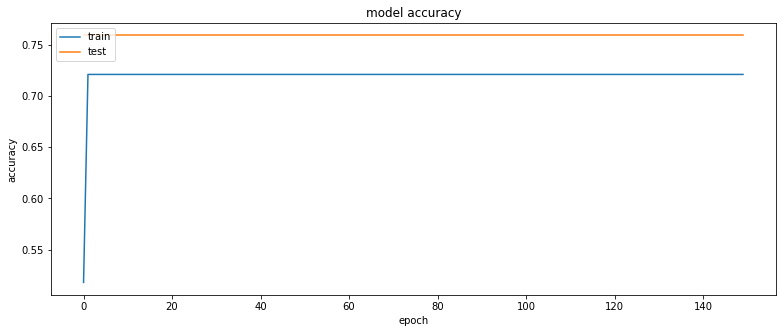

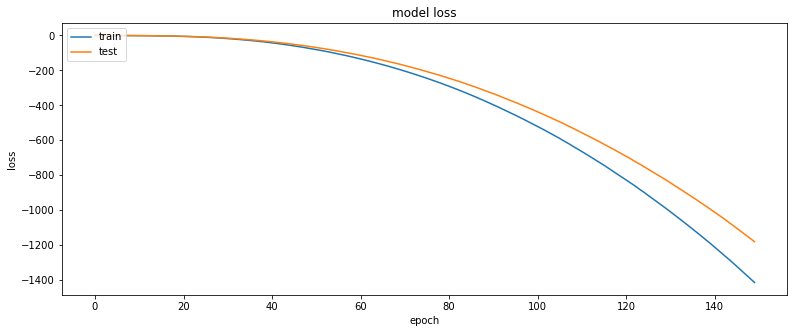

In [61]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
